In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type
'''

'* Average Fare ($) Per City\n* Total Number of Rides Per City\n* Total Number of Drivers Per City\n* City Type (Urban, Suburban, Rural)\n\nIn addition, you will be expected to produce the following three pie charts:\n\n* % of Total Fares by City Type\n* % of Total Rides by City Type\n* % of Total Drivers by City Type\n'

In [100]:
file_location = "../../Resources/Pyber/ride_data.csv"
ride_data = pd.read_csv(file_location)

file_location2 = "../../Resources/Pyber/city_data.csv"
city_data = pd.read_csv(file_location2)
ride_data.head()
#ride_data["city"].nunique()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [101]:
city_data.head()
#city_data["city"].count_values

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [102]:
#We need to group the ride data by city
#it should read city - average fare... that's it?
#merge the two lists
#rock on
try:
    ride_data = ride_data.groupby("city")
except AttributeError:
    print("Already grouped")
ride_series = ride_data["fare"].mean()
ride_count = ride_data["ride_id"].count()
#I think we need the data to be a df to merge it, so let's convert:
ride_df = ride_series.to_frame()
ride_df2 = ride_count.to_frame()
ride_df=ride_df.reset_index()
ride_df2 = ride_df2.reset_index()
ride_df = pd.merge(ride_df, ride_df2, on="city", how="left")
ride_df.head()

,city,fare,ride_id
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [103]:
merge_ride_df = pd.merge(city_data, ride_df, on="city", how="left")
merge_ride_df.head()

,city,driver_count,type,fare,ride_id
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [104]:
merge_ride_df = merge_ride_df.rename(columns = {"city": "City", "ride_id":"Ride Count","driver_count": "Driver Count", "type": "City Type", "fare": "Average Fare"})
merge_ride_df.head()

,City,Driver Count,City Type,Average Fare,Ride Count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [105]:
urban_data = merge_ride_df.loc[merge_ride_df["City Type"] == "Urban"]
suburban_data = merge_ride_df.loc[merge_ride_df["City Type"] == "Suburban"]
rural_data = merge_ride_df.loc[merge_ride_df["City Type"] == "Rural"]

rural_data.head()

,City,Driver Count,City Type,Average Fare,Ride Count
108,South Elizabethmouth,3,Rural,28.698000,5
109,East Troybury,3,Rural,33.244286,7
110,Kinghaven,3,Rural,34.980000,6
111,New Johnbury,6,Rural,35.042500,4
112,Erikport,3,Rural,30.043750,8


In [117]:
'''* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type'''

rural_data["Total Fare"] = rural_data["Average Fare"]*rural_data["Ride Count"]
#rural_data.head()
total_rural_fares = rural_data["Total Fare"].sum()
total_rural_rides = rural_data["Ride Count"].sum()
total_rural_drivers = rural_data["Driver Count"].sum()

#repeat for other city types
urban_data["Total Fare"] = urban_data["Average Fare"]*urban_data["Ride Count"]
#urban_data.head()
total_urban_fares = urban_data["Total Fare"].sum()
total_urban_rides = urban_data["Ride Count"].sum()
total_urban_drivers = urban_data["Driver Count"].sum()

suburban_data["Total Fare"] = suburban_data["Average Fare"]*suburban_data["Ride Count"]
#suburban_data.head()
total_suburban_fares = suburban_data["Total Fare"].sum()
total_suburban_rides = suburban_data["Ride Count"].sum()
total_suburban_drivers= suburban_data["Driver Count"].sum()



C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\thoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

([<matplotlib.patches.Wedge at 0x262d5568438>,
 [Text(-0.348051,-1.04348,'Urban'),
  Text(0.554808,0.949836,'Suburban'),
  Text(-0.679591,0.86496,'Rural')],
 [Text(-0.189846,-0.569173,'62.0%'),
  Text(0.302623,0.518092,'31.4%'),
  Text(-0.370686,0.471797,'6.6%')])

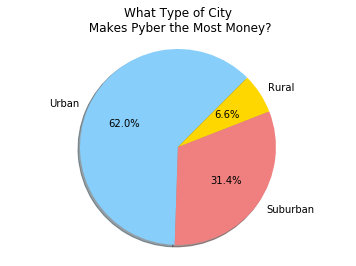

In [130]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [total_urban_fare, total_suburban_fares, total_rural_fare]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
fares_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("What Type of City\n Makes Pyber the Most Money?")
fare_pie

([<matplotlib.patches.Wedge at 0x262d5a908d0>,
 [Text(-1.0697,0.256406,'Urban'),
  Text(1.01385,-0.426748,'Suburban'),
  Text(0.893826,0.641151,'Rural')],
 [Text(-0.583472,0.139858,'67.5%'),
  Text(0.553008,-0.232772,'27.3%'),
  Text(0.487542,0.349719,'5.2%')])

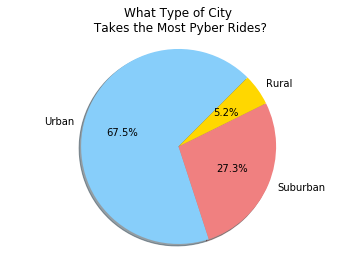

In [131]:
# Labels for the sections of our pie chart
labels2 = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes2 = [total_urban_rides, total_suburban_rides, total_rural_rides]

# The colors of each section of the pie chart
colors2 = ["lightskyblue", "lightcoral", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode2 = (0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
rides_pie = plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("What Type of City\n Takes the Most Pyber Rides?")
rides_pie

([<matplotlib.patches.Wedge at 0x262d5568438>,
 [Text(-0.348051,-1.04348,'Urban'),
  Text(0.554808,0.949836,'Suburban'),
  Text(-0.679591,0.86496,'Rural')],
 [Text(-0.189846,-0.569173,'62.0%'),
  Text(0.302623,0.518092,'31.4%'),
  Text(-0.370686,0.471797,'6.6%')])

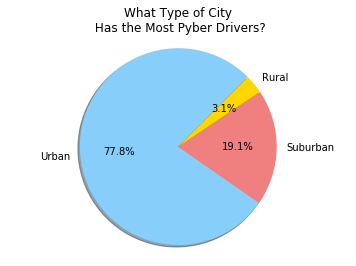

In [132]:
# Labels for the sections of our pie chart
labels3 = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes3 = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]

# The colors of each section of the pie chart
colors3 = ["lightskyblue", "lightcoral", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode3 = (0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
driver_pie = plt.pie(sizes3, explode=explode3, labels=labels3, colors=colors3, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.title("What Type of City\n Has the Most Pyber Drivers?")
fare_pie

AttributeError: 'str' object has no attribute 'shape'

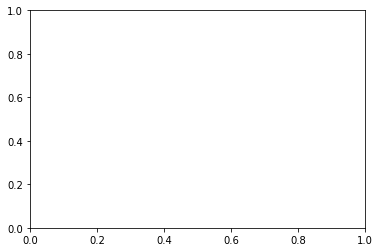

In [85]:
x_axis = merge_ride_df["Driver Count"]
y_axis = merge_ride_df["Average Fare"]
bub_size = merge_ride_df["Ride Count"]
#city_type = merge_ride_df["City Type"]
#bub_color = ["gold" if city_type == "Urban" else "light coral"]
#colors = ["gold", "light sky blue", "light coral"]

#what about splitting the data into 3, doing a different chart for each city type in a different color, then pulling them together?

Urban = 1
Suburban = 2
Rural = 3

merge_ride_df.plot.scatter(x="Driver Count", y="Average Fare", c="City Type", s=bub_size*10)
#merge_ride_df.plot.scatter(x=x_axis, y=y_axis, s=bub_size)